# Kernel Density Estimation (KDE)
- KDE is a method for visualizing finite non-parametric data, i.e., there is no assumption of an underlying distributions type, e.g. Gaussian, and therefore the density function can not be defined by a mean and standard deviation. It is applied to univariate (PDF) or multivariate (contoured scatter plot).
- The univariate KDE is useful in multimodal datasets with limited samples and eliminates the choice of histogram bins that can result in different shapes (bias).
- Bandwidth (smoothing) is the most important varible in smoothing the KDE shape
    - Scott's and Silverman's Bandwidth Rules of Thumb give similar result. 
    - Seaborn's default is similar to Scott's BW, and can be approximated by bw_adjust=1.5, bw_method = 0.2
- Python has multiple modules for evaluating KDE:
    - Scipy
    - Statsmodels
    - Scikit-learn
- **Seaborn** has the simplest interface and Kimberley Fessel has gives a good explantion of KDE and demonstrates KDE modeling <br> https://www.google.com/search?q=how+to+read+a+kde+plot&oq=how+to+read+a+kde+&aqs=chrome.0.0i512j69i57j0i22i30j0i390l3.8475j0j9&sourceid=chrome&ie=UTF-8#kpvalbx=_-X9RYriyLZXjtQbmup3ABg19
- A good overview of Python modules including Scipy, Statsmodels and Scikit-Learn, is given by Jake VanderPlas (including code) <br> https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/ ![image.png] ![image-2.png]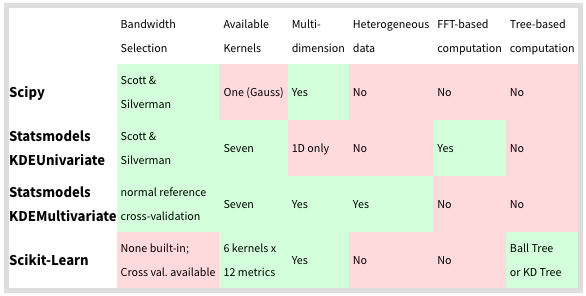

#### Other good references
- Michael G. Lerner explains some of the biases of histogram bins and benefits of KDE and the effects of bandwith <br>
https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28
- This article by Tarn Duong give a consise explaination of how KDE works <br> https://www.mvstat.net/tduong/research/seminars/seminar-2001-05/

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14}) # Global command must set in top


## Create a Bimodal Distribution
<u>**Notes**</u>
- This Jupyter Notebook Examines a bimodel distribution created by overlapping two Beta distributions, one symmetrical and one skewed.
- The actual population of 10,000 is perfectly bimodal, but for the experimental analyses the populations were resamples (n=100)
    - When both the component PDFs are symmetrical, the KDE (n=100) resolves to a bimodal distribution well
    - But, when one of the component PDFs are skewed, the KDE (n=100) can have two or more modes
    - With fewer than 100 samples, e.g. n=30, the shape and number of modes can vary.
    - Experiments changing resample size showed that roughly 100 samples are need to provide reproducible results
- Seaborn's KDE modeling interface is elegant and can produce similar resluts to Scipy and Stratsmodels modules, when bw_adjust=1.5 and bw_method=0.2 (It may take some tuning to get these values where you want)
- Seaborn's default bw_adjust and bw_mentod produce a more smoothed result and is adequate for symmetric bimodes or with larger resamples
- Seaborn's tails have greater extent than Scipy or Stratsmodes KDE modules
- The Scipy CDF function is really-really slow - that makes Seaborn more convenient
- Seaborn arrays have a length of 200, whereas Scipy and Stratsmodels have a lenght of 1000, so anayses that need the PDF and CDF must come from the same module
    


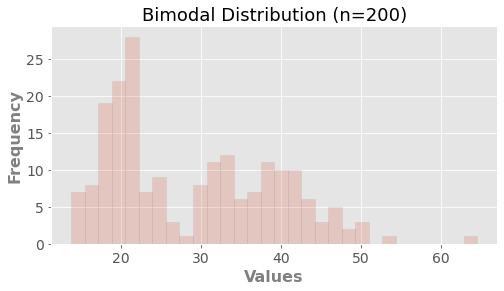

In [2]:
# Create a bimodal distributio
# Beta Distribution
from scipy.stats import beta

# Assign min, most-likely and max values that define the distributions
amin1 = 10 # Set parameters for 1st distribution (Symmetrical)
bml1 =  20 
cmax1 = 30

amin2 = 25  # Set parameters for 2nd distribution (Skewed)
bml2 =  35  
cmax2 = 80  
L=10        # Lambda variable controls the variance of the distribution
size=100    # Try different sample sizes, (Note: composited sample is 2x size)

# Set the shape parameters for the Beta distributions
a1= 1 + L * (bml1-amin1) / (cmax1-amin1)
b1= 1 + L * (cmax1-bml1) / (cmax1-amin1)

a2= 1 + L * (bml2-amin2) / (cmax2-amin2)
b2= 1 + L * (cmax2-bml2) / (cmax2-amin2)

# Generate the random Beta values
bvals1 = beta.rvs(a1, b1, loc=amin1, scale=cmax1-amin1, size=size, random_state=None)
bvals2 = beta.rvs(a2, b2, loc=amin2, scale=cmax2-amin2, size=size, random_state=None)

# Concatenate the random values from both distributions
x = np.concatenate((bvals1, bvals2), axis=None)

fig = plt.figure(figsize=(8,4))
plt.hist(x, bins=30, edgecolor='gray', density=False, alpha=.2)
plt.title('Bimodal Distribution (n='+str(np.size(x))+')', fontsize=18)
plt.xlabel('Values', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Frequency', fontsize =16, fontweight='bold', color='gray')
plt.show()

## How sample size affects KDE
- In this experiment, the variability of the KDE's are seen for multiple trials
- Experiment with *size* variable, try *size=30*, then try *size=100* KDE's stabilize around 100 samples
- Experiment with symmetry: Change the second population to be symmetrical: 25-35-45: KDE is stable with fewer samples
- Seaborn's default bandwidth paramenters seem to give more consistent results

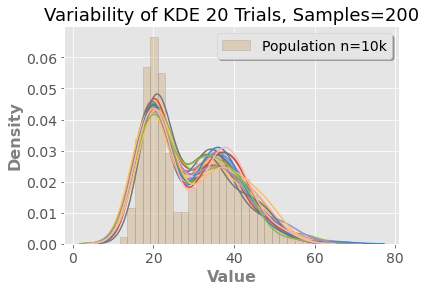

In [3]:


# Seaborn custom bandwidth parameters
bw_adjust=1.5
bw_method = 0.2

# Generate the random Beta values
# Using same Beta shape parameters, but changing the size from 100 to 1000
bvals3 = beta.rvs(a1, b1, loc=amin1, scale=cmax1-amin1, size=10000, random_state=None)
bvals4 = beta.rvs(a2, b2, loc=amin2, scale=cmax2-amin2, size=10000, random_state=None)
x2 = np.concatenate((bvals3, bvals4), axis=None)

############################ Loop Through n_trials with sample size = 100 ####################
n_trials=20
i=0
while(i <=n_trials):
    amin1 = 10 # Set parameters for 1st distribution
    bml1 =  20 
    cmax1 = 30
    
    amin2 = 25  # Set parameters for 2nd distribution
    bml2 =  35  # Try making both populations symmetrical
    cmax2 = 80 
    L=10        # Lambda variable controls the variance of the distribution
    size=100     # Try different sample sizes (note: composited sample is 2x size)
    
    # Set the shape parameters for the Beta distributions
    a1= 1 + L * (bml1-amin1) / (cmax1-amin1)
    b1= 1 + L * (cmax1-bml1) / (cmax1-amin1)
    
    a2= 1 + L * (bml2-amin2) / (cmax2-amin2)
    b2= 1 + L * (cmax2-bml2) / (cmax2-amin2)
    

    # by = beta.pdf(bx, a, b, loc=amin, scale=cmax-amin)
    
    # Generate the random Beta values
    bvals1 = beta.rvs(a1, b1, loc=amin1, scale=cmax1-amin1, size=size, random_state=None)
    bvals2 = beta.rvs(a2, b2, loc=amin2, scale=cmax2-amin2, size=size, random_state=None)
    
    # Concatenate the random values from both distributions
    x = np.concatenate((bvals1, bvals2), axis=None)
    

    
    #sns.kdeplot(data=x, bw_adjust=1.82, bw_method=.1)
    sns.kdeplot(data=x)
    
    i=i+1
############################ End of Loop ####################
    
plt.hist(x2, bins=30, edgecolor='gray', color='tan', density=True, alpha=.5, label='Population n=10k')
plt.title('Variability of KDE ' + str(n_trials)+ ' Trials, Samples=' + str(np.size(x)), fontsize=18)
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
plt.legend(shadow=True)
plt.show()

## Create a Scipy KDE for the biomodal distibution

In [4]:
# Scott's (1992) Bandwidth Rule of thumb: bw=1.06*Std*n**(-1/5)
bw_s = 1.06*np.std(x)*np.size(x)**(-1/5)
print("Scott's Bandwidth:", np.round(bw_s,2))

Scott's Bandwidth: 3.83


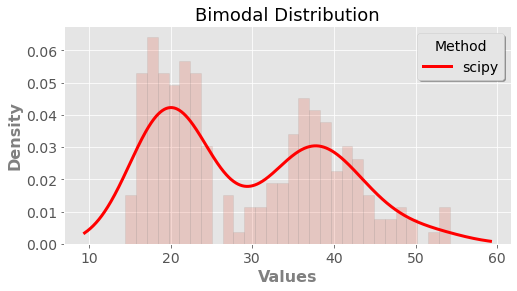

In [5]:
from scipy.stats import gaussian_kde

# Function to refine x_grid array
def kde_scipy(x, x_grid, bandwidth=.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

# The grid we'll use for plotting
x_grid = np.linspace(np.min(x)-5, np.max(x)+5, 1000)
pdf1 = kde_scipy(x, x_grid, bandwidth=bw_s)

fig = plt.figure(figsize=(8,4))
plt.hist(x, bins=30, edgecolor='gray', density=True, alpha=.2)
plt.plot(x_grid, pdf1,lw=3, c='r', label="scipy")
plt.title('Bimodal Distribution', fontsize=18)
plt.xlabel('Values', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
plt.legend(fontsize=14, title='Method', shadow=True)
plt.show()


## Statsmodels Univartiate Method Compared with Scipy and Seaborn Methods
- All three methods seem to give the same results
- **Note how Seaborn's tails extend further than Scipy and Statsmodels' tails**
- Seaborn bw_adjust=1.5 and bw_method=0.2 parameters, if used, are similar to Scott's Bandwidth which appears to be Seaborn's default bandwidth

In [6]:
# Output Seaborn's X and Y arrays without plotting the chart
# Note: I couldn't get the argmax function to work when I included the KDE code in the script below
x_arr, y_arr = sns.kdeplot(x).get_lines()[0].get_data()
plt.close()

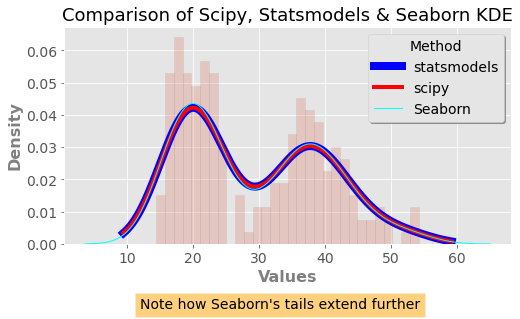

BASIC STATS
Min and Max Scipy:        9.46 59.17
Min and Max Statsmodels:  9.46 59.17
Min and Max Seaborn:      3.6 65.03
Mode Scipy X Value:       20.06
Mode Statsmodels X Value: 20.06
Mode Seaborn X Value:     19.96
Array Length for Seaborn: 200
Array Length for Scipy and Statsmodel KDEs: 1000


In [7]:
from statsmodels.nonparametric.kde import KDEUnivariate
import seaborn as sns

def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)
    # The x_grid we'll use for plotting

pdf2 = kde_statsmodels_u(x, x_grid, bandwidth=bw_s)

fig = plt.figure(figsize=(8,4))
plt.hist(x, bins=30, edgecolor='gray', density=True, alpha=.2)
plt.plot(x_grid, pdf2,lw=8, c='b', label="statsmodels")
plt.plot(x_grid, pdf1,lw=4, c='r', label="scipy")

# Seaborn (Tested and Tuned various bandwidth paramters)
#sns.kdeplot(data=x, bw_adjust=1.5, bw_method=.2, color='cyan', lw=1, label='Seaborn')
sns.kdeplot(data=x,  color='cyan', lw=1, label='Seaborn')

plt.title('Comparison of Scipy, Statsmodels & Seaborn KDE', fontsize=18)
plt.xlabel('Values', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
plt.legend(fontsize=14, title='Method', shadow=True)
plt.figtext(0.5, -.1, "Note how Seaborn's tails extend further",
            ha="center", fontsize=14, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

mode_value1 = x_grid[np.argmax(pdf1)]
mode_value2 = x_grid[np.argmax(pdf2)]
mode_value3 = x_arr[np.argmax(y_arr)]


print('BASIC STATS')
print('Min and Max Scipy:       ', np.round(np.min(x_grid),2), np.round(np.max(x_grid),2))
print('Min and Max Statsmodels: ', np.round(np.min(x_grid),2), np.round(np.max(x_grid),2))
print('Min and Max Seaborn:     ', np.round(np.min(x_arr),2), np.round(np.max(x_arr),2))
print('Mode Scipy X Value:      ', np.round(mode_value1,2))
print('Mode Statsmodels X Value:', np.round(mode_value2,2))
print('Mode Seaborn X Value:    ', np.round(mode_value3,2))
print('Array Length for Seaborn:', len(x_arr))
print('Array Length for Scipy and Statsmodel KDEs:', len(x_grid))






## Cumulative Distribution Function
Statsmodels has a modual for CDF - **IT IS VERY SLOW** <br>
Seaborn CDF is much faster


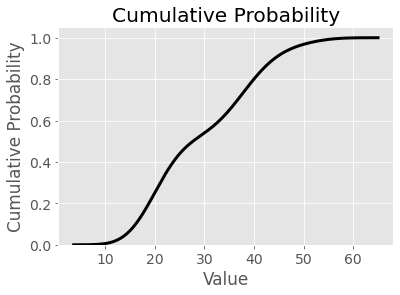

In [8]:
import statsmodels.api as sm

# THE STRATSMODELS CDF CODE BELOW IS REALLY SLOW, BETTER TO USE SEABORN
# dens = sm.nonparametric.KDEUnivariate(bvals)
# dens.fit()
# plt.plot(dens.cdf)
# plt.show()

# Note: x and y seaborn arrays can be exported - see code below
sns.kdeplot(data=x, cumulative=True, color='k', lw=3, legend=True);
plt.ylabel('Cumulative Probability')
plt.xlabel('Value')
plt.title('Cumulative Probability')
plt.show()



## Statistical Treatment of Multimodal Distributions
- Statistical treatment of KDE's mainly involves finding the peak and trough values using inflection points of derivitives
- This analysis involves soothing the KDE by changing the variable *Smooth_fac*
- Overview of statistical measures of multimodal distributions <br> https://en.wikipedia.org/wiki/Multimodal_distribution#:~:text=In%20statistics%2C%20a%20bimodal%20distribution,in%20Figures%201%20and%202.

- Heterogeneity (Extended Abstract) <br> https://www.sciencedirect.com/topics/mathematics/multimodal-distribution

Inflections Points: [20.06 29.46 37.72]
KDE Maxima: 20.06


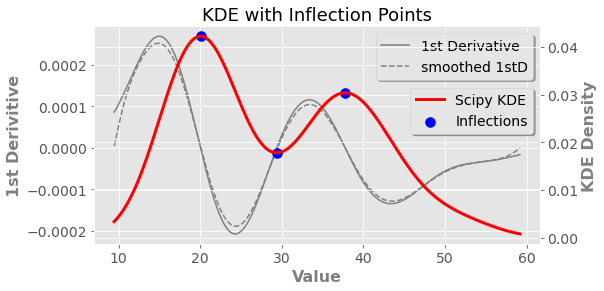

In [9]:
# Finding the KDE Inflection Points for wavelenght statistical treatment and parsing the multimodal KDE

from scipy.ndimage import gaussian_filter1d

# Find the 1st and 2nd derivitives of a numpy array
der1= np.gradient(pdf1)
der2= np.gradient(der1)

# smooth the KDE
smooth_fac=25    # <= You'll have to play with this factor, start with 100
smooth = gaussian_filter1d(pdf1, smooth_fac)

# Smoothed 1st Derivitive
smooth_1d = np.gradient(smooth)

# find switching (inflection) points where positive/negative sign changes and reported as indexed positions
infls = np.where(np.diff(np.sign(smooth_1d)))[0]

# Find the x_grid values corresponding to the Index
x_infls = x_grid[infls]
y_infls = pdf1[infls]


print('Inflections Points:', np.round(x_infls,2))

# Find the X value for the KDE maxima
maxima = x_grid[np.argmax([pdf1])]

print('KDE Maxima:', np.round(maxima,2))

fig, ax1 = plt.subplots(figsize=(8,4))
ax2 = ax1.twinx()
ax1.plot(x_grid, der1, c='gray', label='1st Derivative')
ax2.plot(x_grid, pdf1, c='r', lw=3, label="Scipy KDE")
ax2.scatter(x_infls, y_infls, c='b', s=100, label='Inflections')
ax1.plot(x_grid, smooth_1d, c='gray', ls='--', label='smoothed 1stD')
ax2.legend(bbox_to_anchor=(1, .75),shadow=True)
ax1.legend(bbox_to_anchor=(1, 1), shadow=True)
ax2.set_title('KDE with Inflection Points', fontsize=18)
ax1.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax1.set_ylabel('1st Derivitive', fontsize =16, fontweight='bold', color='gray')
ax2.set_ylabel('KDE Density', fontsize =16, fontweight='bold', color='gray')
plt.show()

## Same Analysis as above, but with Seaborn
The advantage is that the CDF array is more readily avaliable, so the CDF for inflextions points can be easily extracted for a statistical measure

### Extract Seaborn KDE Array

In [10]:
x_arr, y_arr = sns.kdeplot(x).get_lines()[0].get_data()
print('Length of kde x-array:', len(x_arr))
print('Length of kde y-array:', len(y_arr))
plt.close()

# Export kdeplot CDF x and y arrays
x_arr_cdf, y_arr_cdf = sns.kdeplot(x, cumulative=True).get_lines()[0].get_data()
print('Length of cum. x-array:', len(x_arr))
plt.close()

print('Min & Max or x_arr:    ', np.round(np.min(x_arr),2), np.round(np.max(x_arr),2))
print('Min & Max or y_arr:    ', np.round(np.min(y_arr),2), np.round(np.max(y_arr),2))
print('Min & Max or y_arr_cdf:', np.round(np.min(y_arr),2), np.round(np.max(y_arr_cdf),2))


Length of kde x-array: 200
Length of kde y-array: 200
Length of cum. x-array: 200
Min & Max or x_arr:     3.6 65.03
Min & Max or y_arr:     0.0 0.04
Min & Max or y_arr_cdf: 0.0 1.0


### Find Seaborn Inflection Points and report their corresponding CDF values

KDE Inflections Points: [19.96 29.22 37.56]
CDF Inflexion Points [0.251  0.5272 0.7265]
KDE Maxima: 19.96


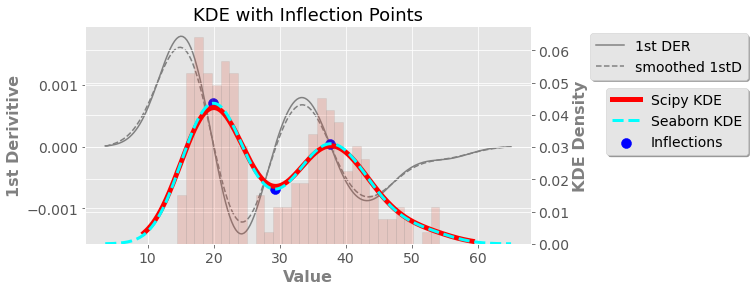

In [11]:
# SEABORN Finding the KDE Inflection Points for wavelenght statistical treatment and parsing the multimodal KDE

from scipy.ndimage import gaussian_filter1d

# Find the 1st and 2nd derivitives of a numpy array
sb_der1= np.gradient(y_arr)
sb_der2= np.gradient(sb_der1)

# smooth
smooth_fac=5   # You'll have to play with this factor, start with 100
smooth = gaussian_filter1d(y_arr, smooth_fac)

# Smoothed 2nd Derivitive
smooth_1d = np.gradient(smooth)

# find switching (inflection) points where positive/negative sign changes and reported as indexed positions
infls = np.where(np.diff(np.sign(smooth_1d)))[0]

# Find the values corresponding to the Index
x_infls = x_arr[infls]
y_infls = y_arr[infls]
cdf_infls = y_arr_cdf[infls]


print('KDE Inflections Points:', np.round(x_infls,2))
print('CDF Inflexion Points', np.round(cdf_infls,4))

# Find the X value for the KDE maxima
maxima = x_arr[np.argmax([y_arr])]

print('KDE Maxima:', np.round(maxima,2))

fig, ax1 = plt.subplots(figsize=(8,4))
ax2 = ax1.twinx()
ax1.plot(x_arr, sb_der1, c='gray', label='1st DER')
ax2.plot(x_grid, pdf1, c='r', lw=5, label='Scipy KDE')
ax2.plot(x_arr, y_arr, c='cyan', lw=3, ls='--', label="Seaborn KDE")
plt.hist(x, bins=30, edgecolor='gray', density=True, alpha=.2)
ax2.scatter(x_infls, y_infls, c='b', s=100, label='Inflections')
ax1.plot(x_arr, smooth_1d, c='gray', ls='--', label='smoothed 1stD')
ax1.legend(bbox_to_anchor=(1.5, 1), shadow=True)
ax2.legend(bbox_to_anchor=(1.5, .75),shadow=True)
ax2.set_title('KDE with Inflection Points', fontsize=18)
ax1.set_xlabel('Value', fontsize =16, fontweight='bold', color='gray')
ax1.set_ylabel('1st Derivitive', fontsize =16, fontweight='bold', color='gray')
ax2.set_ylabel('KDE Density', fontsize =16, fontweight='bold', color='gray')
plt.show()



KDE Inflections Points: [19.96 29.22 37.56]
CDF Inflexion Points [0.251  0.5272 0.7265]
Probability in Population 1: 0.53
Probability in Population 2: 0.47


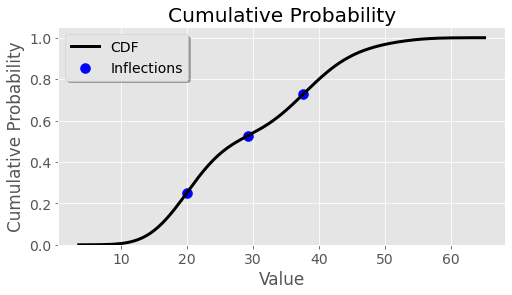

In [28]:
print('KDE Inflections Points:', np.round(x_infls,2))
print('CDF Inflexion Points', np.round(cdf_infls,4))

prob_pop1=cdf_infls[1]
prob_pop2=1-prob_pop1

print('Probability in Population 1:', np.round(prob_pop1,2))
print('Probability in Population 2:', np.round(prob_pop2,2))

# Note: x and y seaborn arrays can be exported - see code below
fig = plt.figure(figsize=(8,4))
sns.kdeplot(data=x, cumulative=True, color='k', lw=3, label='CDF', legend=True)
plt.scatter(x_infls, cdf_infls, c='b', s=100, label='Inflections')
plt.ylabel('Cumulative Probability')
plt.xlabel('Value')
plt.title('Cumulative Probability')
plt.legend(shadow=True)
plt.show()

## Actual Beta Populations Vs Resampled Population KDE

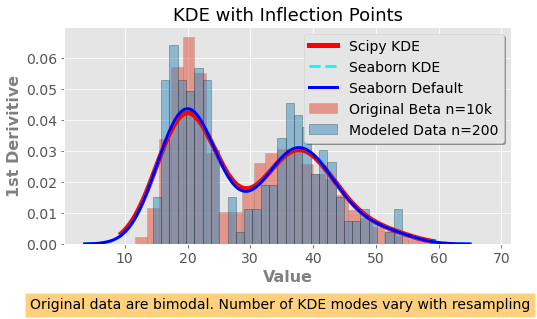

In [13]:
# Extract KDE array variables
x_arr_0, y_arr_0= sns.kdeplot(data=x).get_lines()[0].get_data()
plt.close()

# x2 are the concatenated 10,000 random values fitting the original bimodal distribution
x2 = np.concatenate((bvals3, bvals4), axis=None)

plt.subplots(figsize=(8,4))
plt.plot(x_grid, pdf1, c='r', lw=5, label='Scipy KDE')
plt.plot(x_arr, y_arr, c='cyan', lw=3, ls='--', label="Seaborn KDE")
plt.plot(x_arr_0, y_arr_0, c='b', lw=3, label= 'Seaborn Default')
plt.hist(x2, bins=30, edgecolor='gray', density=True, alpha=.5, label='Original Beta n=10k')
plt.hist(x, bins=30, edgecolor='black', density=True, alpha=.5, label='Modeled Data n=200')
plt.legend(shadow=True)

plt.title('KDE with Inflection Points', fontsize=18)
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('1st Derivitive', fontsize =16, fontweight='bold', color='gray')
plt.figtext(0.5, -.1, "Original data are bimodal. Number of KDE modes vary with resampling",
            ha="center", fontsize=14, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

plt.show()

## Multivariate KDE
- The bimodal example above was constructed by joining two overlapping pdfs (pdf1 & pdf2).
- In this section we'll look at a multivariate analysis of pdf1 vs pdf2 using Seaborn's modules <br>
<u>**What is a multivariate KDE?**</u>
- The multivariate KDE looks at two or more covaring density distribution as a multidimensional plot, e.g., scatter plot with contours or a 3-D plot.
- This analysis is generally applied when the input variable covary


### Example 1.  Seaborn with two variable that do not covary

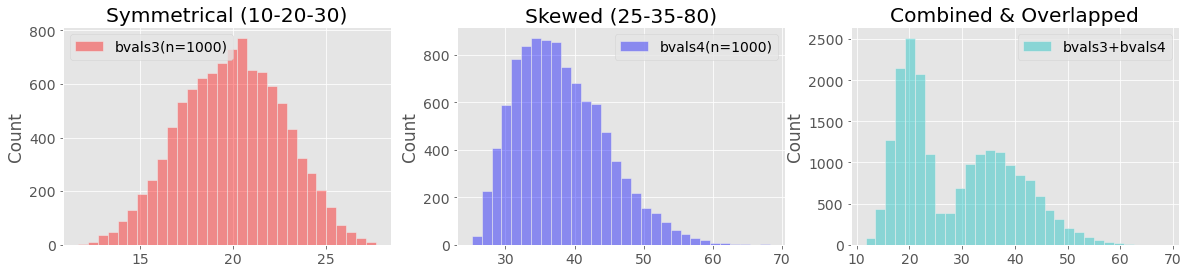

In [14]:
import seaborn as sns

fig, axs = plt.subplots(ncols=3, figsize=(20,4))

title1_str='Symmetrical (10-20-30)'
title2_str='Skewed (25-35-80)'

sns.histplot(data=(bvals3), bins=30, alpha=.4, color='r', label='bvals3(n=1000)',ax=axs[0])
sns.histplot(data=(bvals4), bins=30, alpha=.4, color='b', label='bvals4(n=1000)',ax=axs[1])
sns.histplot(data=(x2),     bins=30, alpha=.4, color='c',label='bvals3+bvals4',ax=axs[2])
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].set_title(str(title1_str))
axs[1].set_title(str(title2_str))
axs[2].set_title('Combined & Overlapped')
plt.show()


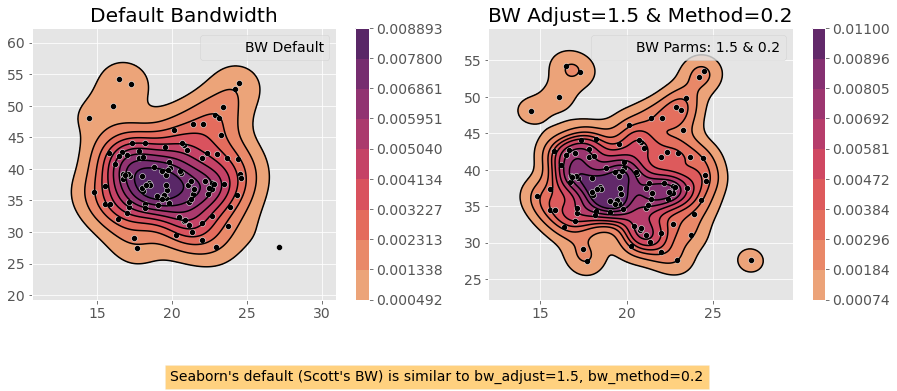

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

sns.kdeplot(x=bvals1, y=bvals2, color='k', ax=axs[0])
sns.kdeplot(x=bvals1, y=bvals2, fill=True, label="BW Default", cbar=True, ax=axs[0], cmap='flare')
sns.kdeplot(x=bvals1, y=bvals2, color='k', bw_adjust=bw_adjust, bw_method=bw_method, ax=axs[1])
sns.kdeplot(x=bvals1, y=bvals2, fill=True, label=("BW Parms: " +  str(bw_adjust) + ' & ' +str(bw_method)),
                                    bw_adjust=bw_adjust, bw_method=bw_method, cbar=True, ax=axs[1], cmap='flare')
sns.scatterplot(x=bvals1, y=bvals2, color='k',ax=axs[0])
sns.scatterplot(x=bvals1, y=bvals2, color='k',ax=axs[1])

axs[0].set_title('Default Bandwidth')
axs[1].set_title('BW Adjust=1.5 & Method=0.2')

plt.figtext(0.5, -.1, "Seaborn's default (Scott's BW) is similar to bw_adjust=1.5, bw_method=0.2",
            ha="center", fontsize=14, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

plt.show()


### Example 2. Compare Multivariate KDE from above with a variable that covaries

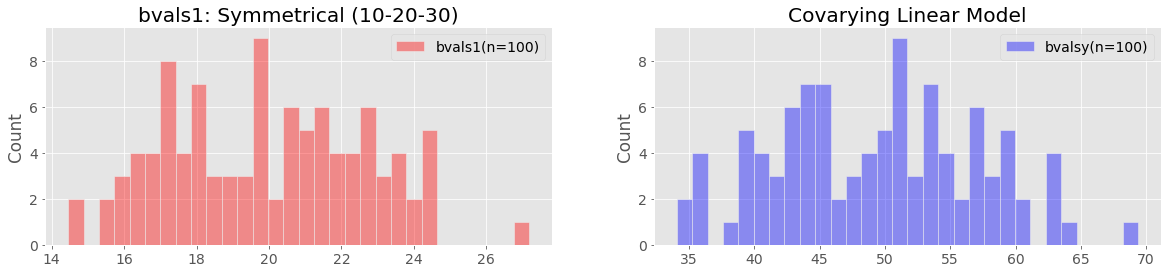

100

In [16]:
import seaborn as sns
from scipy.stats import norm

# Create covaring data for the symmetrical distribution (bvals1) using a linear model (y=mx+b)
m=2
b=np.random.randint(2,18,size=100)
bvalsy=m*bvals1+b

fig, axs = plt.subplots(ncols=2, figsize=(20,4))

title1_str='bvals1: Symmetrical (10-20-30)'
title2_str='Covarying Linear Model'

sns.histplot(data=(bvals1), bins=30, alpha=.4, color='r', label='bvals1(n=100)',ax=axs[0])
sns.histplot(data=(bvalsy), bins=30, alpha=.4, color='b', label='bvalsy(n=100)',ax=axs[1])
axs[0].legend()
axs[1].legend()
axs[0].set_title(str(title1_str))
axs[1].set_title(str(title2_str))
plt.show()
np.size(bvals1)

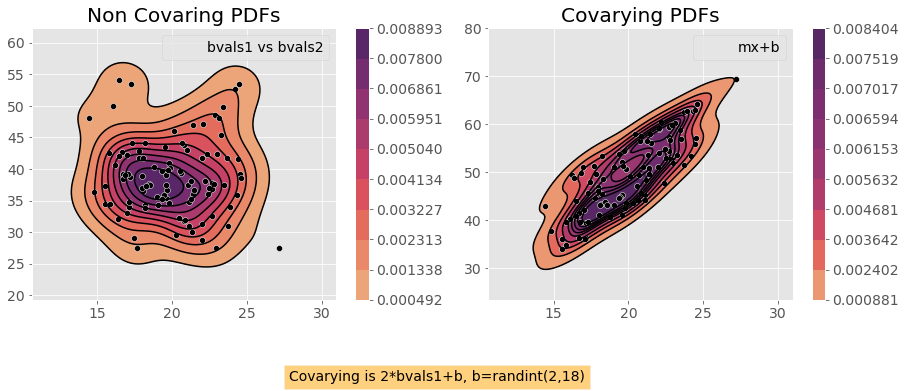

In [17]:
# Compare the covaring pdfs
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

sns.kdeplot(x=bvals1, y=bvals2, color='k', ax=axs[0])
sns.kdeplot(x=bvals1, y=bvals2, fill=True, label="bvals1 vs bvals2", cbar=True, ax=axs[0], cmap='flare')
sns.kdeplot(x=bvals1, y=bvalsy, color='k', ax=axs[1])
sns.kdeplot(x=bvals1, y=bvalsy, fill=True, label="mx+b", cbar=True, ax=axs[1], cmap='flare')
sns.scatterplot(x=bvals1, y=bvals2, color='k',ax=axs[0])
sns.scatterplot(x=bvals1, y=bvalsy, color='k',ax=axs[1])

axs[0].set_title('Non Covaring PDFs')
axs[1].set_title('Covarying PDFs')

plt.figtext(0.5, -.1, "Covarying is 2*bvals1+b, b=randint(2,18)",
            ha="center", fontsize=14, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

plt.show()

## Statsmodel multivariate Model (in progress)

In [18]:
import statsmodels.api as sm
dens_u = sm.nonparametric.KDEMultivariate(data=[bvals1, bvals2], var_type='cc', bw='normal_reference')
dens_u

# from statsmodels.nonparametric.kernel_density import KDEMultivariate
    
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, bw=bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)

#df_1=kde_statsmodels_m(bvals1, x_grid, bandwidth=4)


## Compare Seaborn Vs FastKDE multivariate KDE approach
- Requires the one-time instal of *fastkde* (pip install fastkde)
- https://pypi.org/project/fastkde/
- fastKDE calculates a kernel density estimate of arbitrarily dimensioned data; it does so rapidly and robustly using recently developed KDE techniques. It does so with statistical skill that is as good as state-of-the-science ‘R’ KDE packages, and it does so 10,000 times faster for bivariate data (even better improvements for higher dimensionality)<br>
<u>**Please cite the following papers when using this method:**</u>
- O’Brien, T. A., Kashinath, K., Cavanaugh, N. R., Collins, W. D. & O’Brien, J. P. A fast and objective multidimensional kernel density estimation method: fastKDE. Comput. Stat. Data Anal. 101, 148–160 (2016).
- O’Brien, T. A., Collins, W. D., Rauscher, S. A. & Ringler, T. D. Reducing the computational cost of the ECF using a nuFFT: A fast and objective probability density estimation method. Comput. Stat. Data Anal. 79, 222–234 (2014).

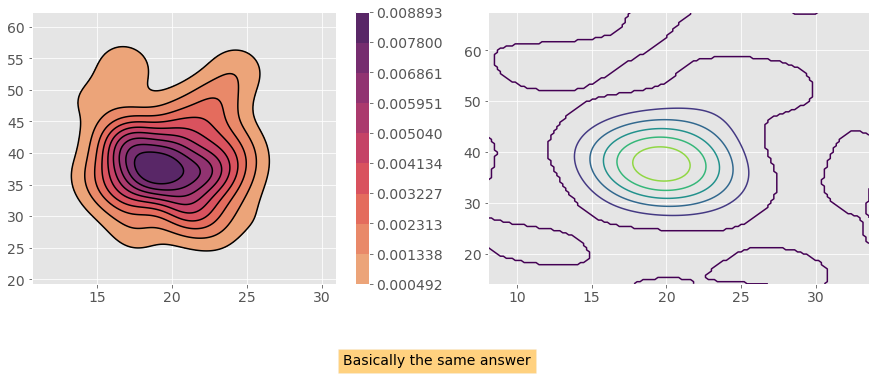

In [19]:
import numpy as np
from fastkde import fastKDE
import pylab as PP

var1=bvals1
var2=bvals2

#Do the self-consistent density estimate
myPDF,axes = fastKDE.pdf(var1,var2)

#Extract the axes from the axis list
v1,v2 = axes

fig, axs = plt.subplots(ncols=2, figsize=(15,5))

sns.kdeplot(x=bvals1, y=bvals2, color='k', ax=axs[0])
sns.kdeplot(x=bvals1, y=bvals2, fill=True, label="BW Default", cbar=True, ax=axs[0], cmap='flare')

PP.contour(v1,v2,myPDF)
plt.figtext(0.5, -.1, "Basically the same answer",
            ha="center", fontsize=14, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
PP.show()


## Example of a 3D KDE Analysis
- https://stackoverflow.com/questions/21918529/multivariate-kernel-density-estimation-in-python
- May need to run several times as the analysis sometimes generates invalid values


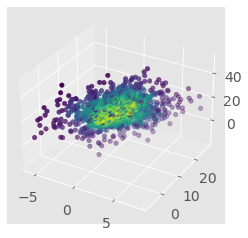

In [20]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mu=np.array([1,10,20])
sigma=np.matrix([[4,10,0],[10,25,0],[0,0,100]])
data=np.random.multivariate_normal(mu,sigma,1000)
values = data.T

kde = stats.gaussian_kde(values)
density = kde(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
_x, y, z = values
ax.scatter(_x, y, z, c=density)
plt.show()

## Appendix. Sample code for identifing inflection points
- https://stackoverflow.com/questions/62537703/how-to-find-inflection-point-in-python

[108 590 908]


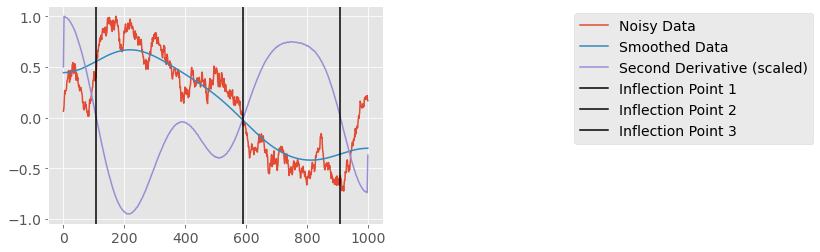

In [21]:
#Sample Code from (https://stackoverflow.com/questions/62537703/how-to-find-inflection-point-in-python)
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d


np.random.seed(0)

# generate noisy data
raw = np.cumsum(np.random.normal(5, 100, 1000))
raw /= np.max(raw)

# smooth
smooth = gaussian_filter1d(raw, 100)

# compute second derivative
smooth_d2 = np.gradient(np.gradient(smooth))

# find switching points
_infls = np.where(np.diff(np.sign(smooth_d2)))[0]

# plot results
plt.plot(raw, label='Noisy Data')
plt.plot(smooth, label='Smoothed Data')
plt.plot(smooth_d2 / np.max(smooth_d2), label='Second Derivative (scaled)')
for i, infl in enumerate(_infls, 1):
    plt.axvline(x=infl, color='k', label=f'Inflection Point {i}')
plt.legend(bbox_to_anchor=(1.55, 1.0))
print(_infls)
